In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.arange(-8., 8., 0.1)

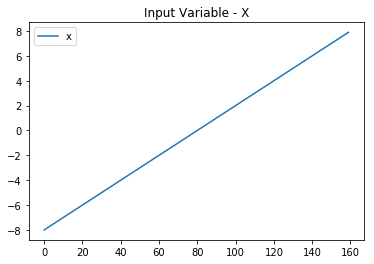

In [4]:
plt.plot(x, label='x')
plt.title('Input Variable - X')
plt.legend(loc='best')

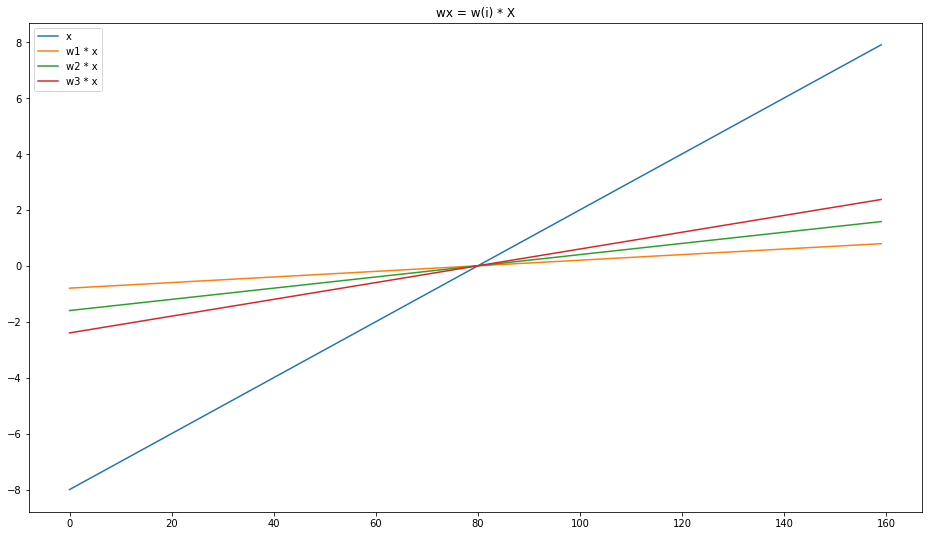

In [7]:
w1 = 0.1
w2 = 0.2
w3 = 0.3

w1x = w1 * x
w2x = w2 * x
w3x = w3 * x

plt.figure(figsize=(16, 9))
plt.plot(x, label='x')
plt.plot(w1x, label='w1 * x')
plt.plot(w2x, label='w2 * x')
plt.plot(w3x, label='w3 * x')
plt.title('wx = w(i) * X')
plt.legend(loc='best')

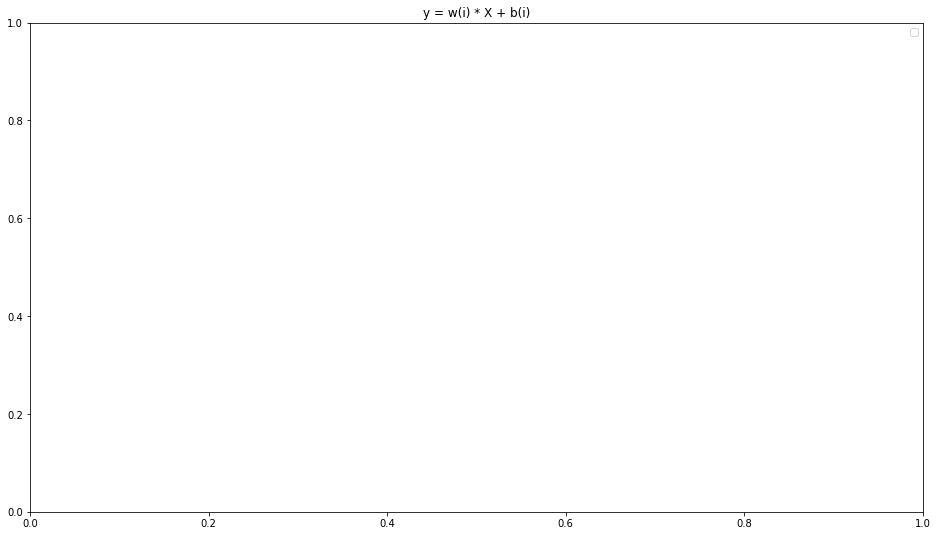

In [8]:
b1 = 0.1
b2 = 0.2
b3 = 0.3

y1 = w1 * x + b1 
y2 = w2 * x + b2
y3 = w3 * x + b3

plt.figure(figsize=(16, 9))

'''
Your plotting code goes here.
Plot y1, y2, y3
'''

plt.title('y = w(i) * X + b(i)')
plt.legend(loc='best')

In [6]:
def sigmoid(inp):
    return 1 / (1 + np.exp(-inp))

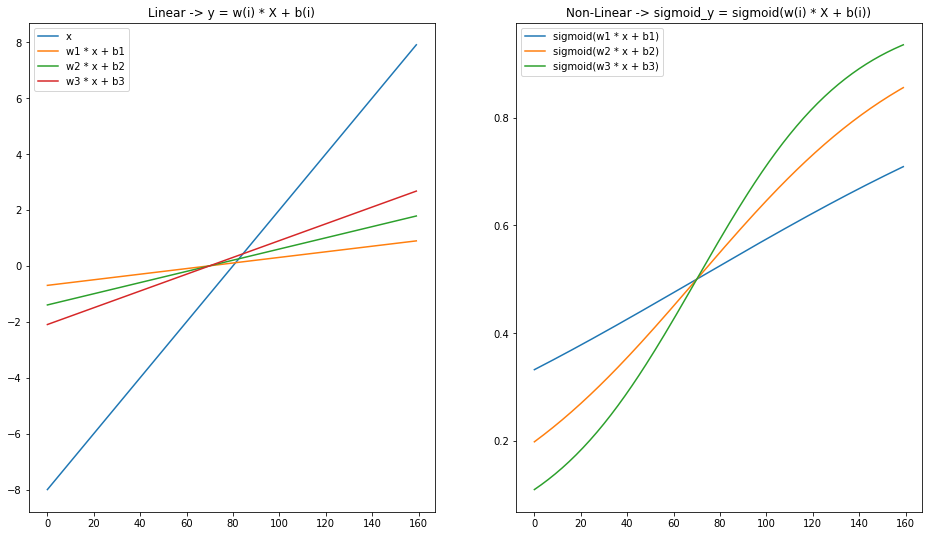

In [7]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.plot(x, label='x')
plt.plot(y1, label='w1 * x + b1')
plt.plot(y2, label='w2 * x + b2')
plt.plot(y3, label='w3 * x + b3')
plt.title('Linear -> y = w(i) * X + b(i)')
plt.legend(loc='best')

'''
Find sigmoid_y1, sigmoid_y2, sigmoid_y3.   
'''


plt.subplot(1, 2, 2)
plt.plot(sigmoid_y1, label='sigmoid(w1 * x + b1)')
plt.plot(sigmoid_y2, label='sigmoid(w2 * x + b2)')
plt.plot(sigmoid_y3, label='sigmoid(w3 * x + b3)')
plt.title('Non-Linear -> sigmoid_y = sigmoid(w(i) * X + b(i))')
plt.legend(loc='best')

## Naive Implementation

In [8]:
x1 = 0.1
x2 = 0.2
x3 = 0.3

w1 = 1.0
w2 = 2.0
w3 = 3.0

b = 0.0

y = w1 * x1 + w2 * x2 + w3 * x3 + b
sigmoid_y = sigmoid(y)
print sigmoid_y

0.8021838885585817


But it is looks tidious if we have 10 inputs(features). So lets make it vectorized.

## Vectorized Implementaion - I

In [9]:
vector_x = np.array([0.1, 0.2, 0.3])
vector_w = np.array([1.0, 2.0, 3.0])
vector_b = np.array([0.5])

vector_sigmoid_y = sigmoid(np.sum(vector_x * vector_w) + vector_b)
print vector_sigmoid_y

[0.86989153]


## Vectorized Implementaion - II

In [10]:
vector_x = np.array([0.1, 0.2, 0.3])
vector_w = np.array([1.0, 2.0, 3.0])
vector_b = np.array([0.5])

vector_sigmoid_y = sigmoid(np.matmul(vector_x.T, vector_w) + vector_b)
print vector_sigmoid_y

[0.86989153]


Lets stack n neurons

In [12]:
vector_x = np.array([0.1, 0.2, 0.3])
vector_w = np.array([[1.0, 2.0, 3.0],
                     [1.5, 2.0, 3.86],
                     [1.8, 0.24, 3.0]])
vector_b = np.array([0.5, 0.5, 0.78])

vector_sigmoid_y = sigmoid(np.matmul(vector_w, vector_x) + vector_b)
print vector_sigmoid_y

[0.86989153 0.90096562 0.87079429]


In [13]:
def layer(x, w, b):
    return sigmoid(np.matmul(x, w) + b)

In [14]:
print layer(vector_x, vector_w, vector_b)

[0.80845465 0.76350633 0.9400262 ]


In [15]:
vector_x = np.random.randn(3, 3)
vector_w = np.array([[1.0, 2.0, 3.0],
                     [1.5, 2.0, 3.86],
                     [1.8, 0.24, 3.0]])
vector_b = np.random.randn(3)

vector_sigmoid_y = layer(vector_x, vector_w, vector_b)
print vector_sigmoid_y

[[0.89612378 0.58054244 0.96234133]
 [0.53173946 0.06094066 0.10353008]
 [0.78512661 0.75025398 0.91772277]]


In [16]:
vector_x = np.random.randn(3, 3)

vector_w1 = np.random.randn(3, 3)
vector_b1 = np.random.randn(3)

vector_w2 = np.random.randn(3, 1)
vector_b2 = np.random.randn(1)

vector_sigmoid_y1 = layer(vector_x, vector_w1, vector_b1)
vector_sigmoid_y2 = layer(vector_sigmoid_y1, vector_w2, vector_b2)
print vector_sigmoid_y1
print vector_sigmoid_y2

[[0.60081923 0.18618428 0.58288892]
 [0.95259125 0.82024738 0.80448049]
 [0.64583304 0.81319884 0.78970748]]
[[0.87708078]
 [0.97249204]
 [0.97188754]]


In [17]:
def cost_function(y_predicted, y_truth):
    return 0.5 * np.sum(np.square(y_predicted.ravel() - y_truth), axis=0)

In [18]:
def df_cost_function(y_predicted, y_truth, grad):
    return grad * np.sum(y_predicted.ravel() - y_truth)

In [19]:
def df_sigmoid(y, grad):
    return grad * y * (1 - y)

In [20]:
def df_layer(x, w, b, grad):
    y = layer(x, w, b)
    df1 = df_sigmoid(y, grad)
    return np.matmul(x.T, df1), np.sum(grad, axis=0), np.matmul(df1, w.T)

In [21]:
vector_x = np.random.randn(1000, 3)

vector_w1 = np.random.randn(3, 1)
vector_b1 = np.random.randn(1)

# vector_w2 = np.random.randn(3, 1)
# vector_b2 = np.random.randn(1)
temp = np.matmul(vector_x, np.array([0.1, 0.5, 0.9]))
vector_y_truth = temp + np.random.randn(*temp.shape) * 0.1

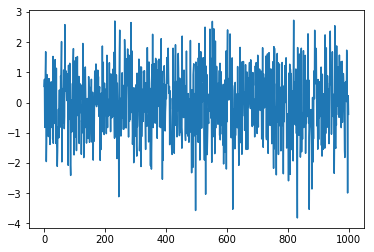

In [22]:
plt.plot(vector_y_truth)

In [23]:
loss_over_time = []
lr = 1.0
for i in range(1000):
    y_predicted = layer(vector_x, vector_w1, vector_b1)
    
    cost = cost_function(y_predicted=y_predicted, y_truth=vector_y_truth)
    df_loss = df_cost_function(y_predicted, vector_y_truth, cost)
    df_w1, df_b1, df_layer1 = df_layer(vector_x, vector_w1, vector_b1, df_loss)

    vector_w1 -= lr * df_w1
    vector_b1 -= lr * df_b1
    
    y_predicted = layer(vector_x, vector_w1, vector_b1)
    
    cost = cost_function(y_predicted=y_predicted, y_truth=vector_y_truth)
    loss_over_time.append(cost)

/home/brv/miniconda3/envs/dl/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


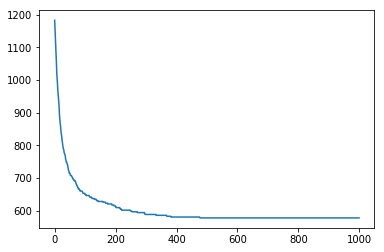

In [24]:
plt.plot(loss_over_time)